# <a href="#Analysis-on-EMH-+-present-day-Europeans">EMH + present-day Europe</a>

<a href="#Using-all-samples,-weighted-by-the-SNP-count-(EMH-+-present-day-Europe)">Weighted `lm`</a>

<a href="#Filtering-for-samples-with-#-of-SNPs->-snp_cutoff,-weighted-by-the-SNP-count-(EMH-+-present-day-Europe)">Weighted `lm` - filtering for # SNPs</a>

# <a href="#Analysis-on-EMH-without-present-day-Europeans">EMH without present-day Europe</a>

<a href="#Using-all-samples,-weighted-by-the-SNP-count-(EMH-only)">Weighted `lm`</a>

<a href="#Filtering-for-samples-with-#-of-SNPs->-snp_cutoff,-weighted-by-the-SNP-count-(EMH-only)">Weighted `lm` - filtering for # SNPs</a>

In [1]:
library(tidyverse)
library(magrittr)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



In [2]:
load("/mnt/scratch/mp/slim-neanderthal/admixtools/nea_estimates.RData")

Remove the Middle East samples (ond potentially the non-UDG + weird library prep samples):

In [3]:
non_udg_samples <- c("")
non_udg_samples <- c("AfontovaGora3", "Kotias", "Oase1", "Satsurblia", "Villabruna")

nea_estimates %<>% filter(pop %in% c("EMH", "WestEurasia"),
                          !name %in% c("BedouinB", "Druze", "Iranian", "Iraqi_Jew",
                                       "Jordanian", "Palestinian", "Samaritan", "Turkish", "Yemenite_Jew"),
                          !name %in% non_udg_samples)

In [4]:
plot_nea_vs_time <- function(m, snp_cutoff=0, age_cutoff=-Inf) {
    filter(nea_estimates,
           method == m,
           snp_count > snp_cutoff,
           age > age_cutoff) %>% {(
    ggplot(., aes(age, alpha)) +
        geom_point(aes(size=snp_count), alpha=1/2) +
        geom_smooth(method="lm", linetype=2, fullrange=TRUE, size=0.5) +
#        geom_smooth(alpha=1/5, fill="red",  color="red",  data=filter(., pop != "WestEurasia"), aes(age, alpha), method="lm", linetype=2, fullrange=TRUE, size=0.5) +
#        geom_smooth(alpha=1/5, fill="blue", color="blue", data=.,                               aes(age, alpha), method="lm", linetype=2, fullrange=TRUE, size=0.5) +        
        xlim(47000, 0) + ylim(0, 0.05) +
        ggtitle(paste0("analysis setup: ", m))
    )}
}

In [5]:
run_lm <- function(m, snp_cutoff=0, age_cutoff=-Inf) {
    filter(nea_estimates,
           method == m,
           snp_count >= snp_cutoff,
           age >= age_cutoff) %>%
    { lm(.[["age"]] ~ .[["alpha"]]) } %>% 
    summary
}

<br><br><br><br><br>
# Analysis on EMH + present-day Europeans

## Using all samples, weighted by the SNP count (EMH + present-day Europe)

In [6]:
options(repr.plot.width=9, repr.plot.height=5)


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
-10178  -5955  -4236   2768  38889 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -54267      10053  -5.398 2.42e-06 ***
.[["alpha"]]  3160146     487454   6.483 5.98e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10020 on 45 degrees of freedom
Multiple R-squared:  0.4829,	Adjusted R-squared:  0.4714 
F-statistic: 42.03 on 1 and 45 DF,  p-value: 5.976e-08


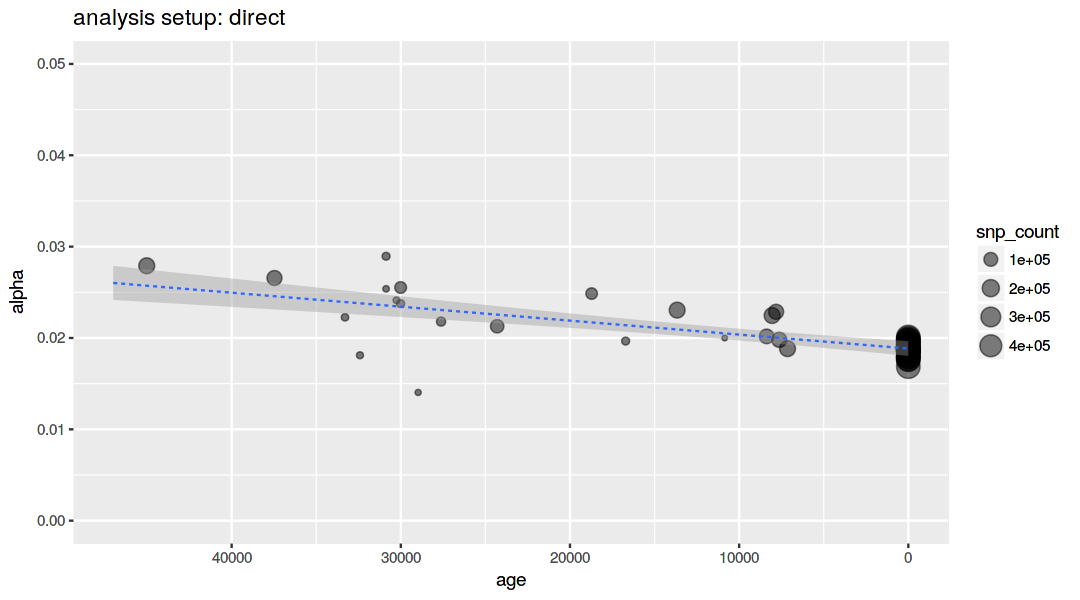

In [7]:
plot_nea_vs_time("direct")
run_lm("direct")

Warning message:
“Removed 7 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 7 rows containing missing values (geom_point).”


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
-26843  -5973  -4244   6832  27698 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     760.9     1564.3   0.486    0.628    
.[["alpha"]] 462021.9    61118.2   7.559 2.65e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9978 on 94 degrees of freedom
Multiple R-squared:  0.3781,	Adjusted R-squared:  0.3715 
F-statistic: 57.15 on 1 and 94 DF,  p-value: 2.653e-11


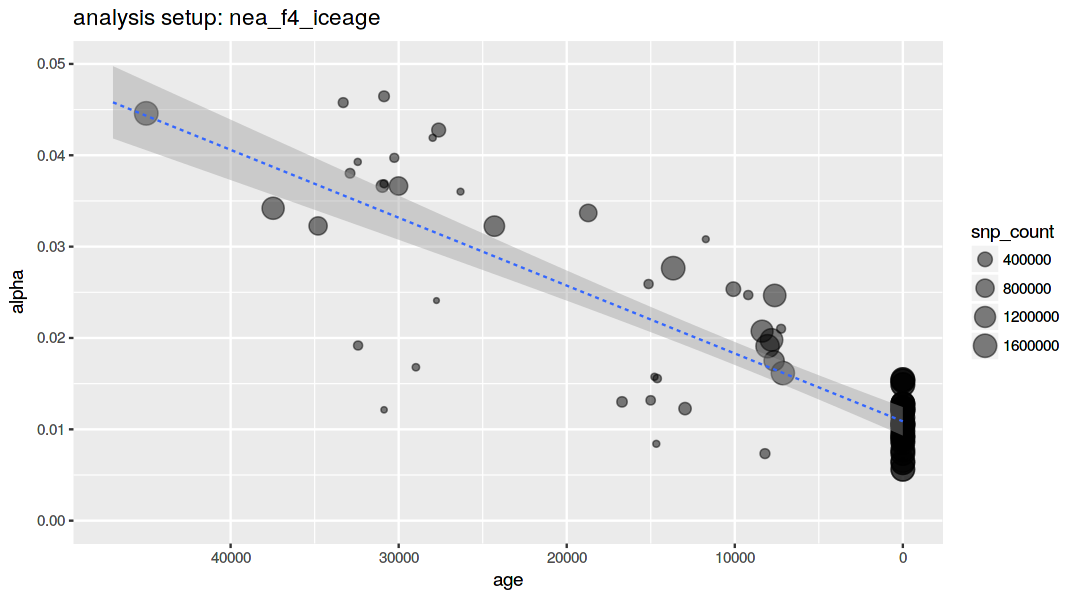

In [8]:
plot_nea_vs_time("nea_f4_iceage")
run_lm("nea_f4_iceage")

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 4 rows containing missing values (geom_point).”


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
-10499  -9690  -9023   5765  34708 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)      6106       2426   2.516   0.0135 *
.[["alpha"]]   201094     114453   1.757   0.0822 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12450 on 94 degrees of freedom
Multiple R-squared:  0.0318,	Adjusted R-squared:  0.0215 
F-statistic: 3.087 on 1 and 94 DF,  p-value: 0.08217


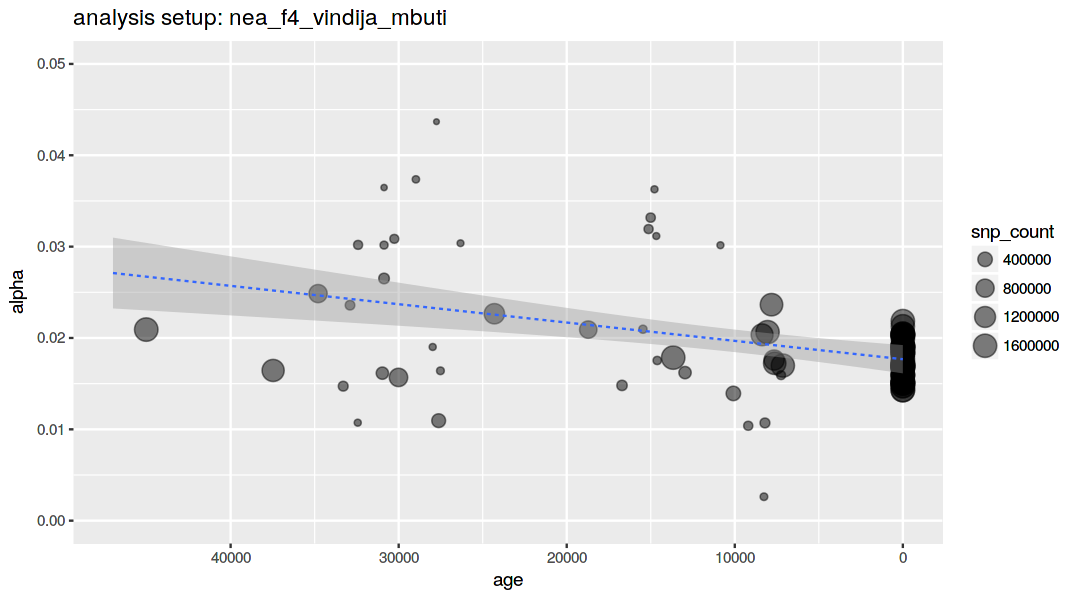

In [9]:
plot_nea_vs_time("nea_f4_vindija_mbuti")
run_lm("nea_f4_vindija_mbuti")

Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 3 rows containing missing values (geom_point).”


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
-10143  -9776  -9463   5875  34954 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)      7657       2756   2.778   0.0066 **
.[["alpha"]]    92259     108130   0.853   0.3957   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12600 on 94 degrees of freedom
Multiple R-squared:  0.007685,	Adjusted R-squared:  -0.002872 
F-statistic: 0.728 on 1 and 94 DF,  p-value: 0.3957


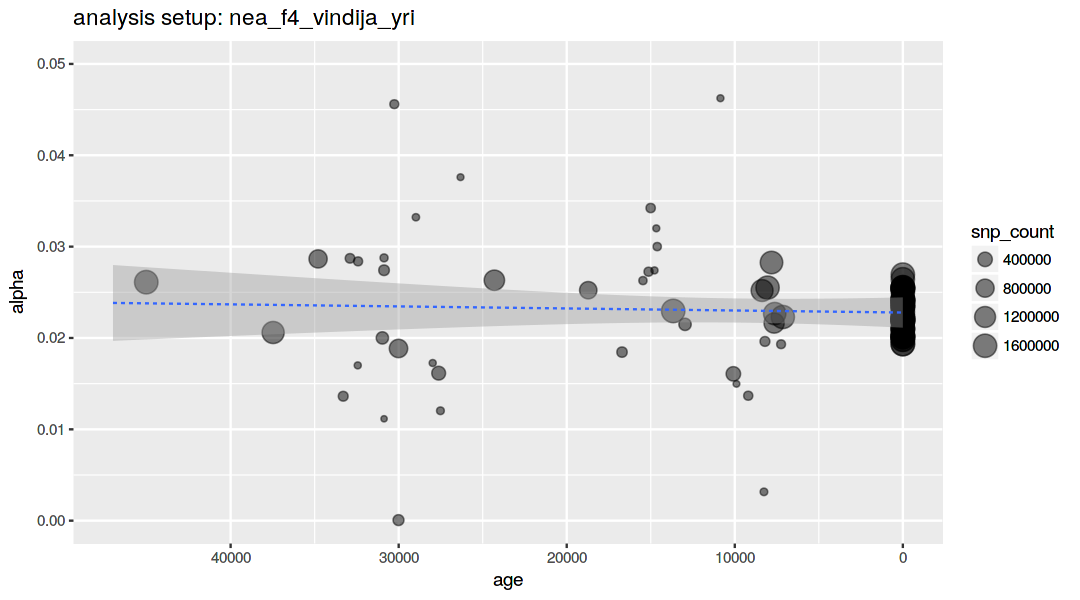

In [10]:
plot_nea_vs_time("nea_f4_vindija_yri")
run_lm("nea_f4_vindija_yri")

Warning message:
“Removed 5 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 5 rows containing missing values (geom_point).”


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
-10395  -9671  -9061   4794  34785 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)      5698       2849   2.000   0.0484 *
.[["alpha"]]   180808     114081   1.585   0.1163  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12490 on 94 degrees of freedom
Multiple R-squared:  0.02603,	Adjusted R-squared:  0.01567 
F-statistic: 2.512 on 1 and 94 DF,  p-value: 0.1163


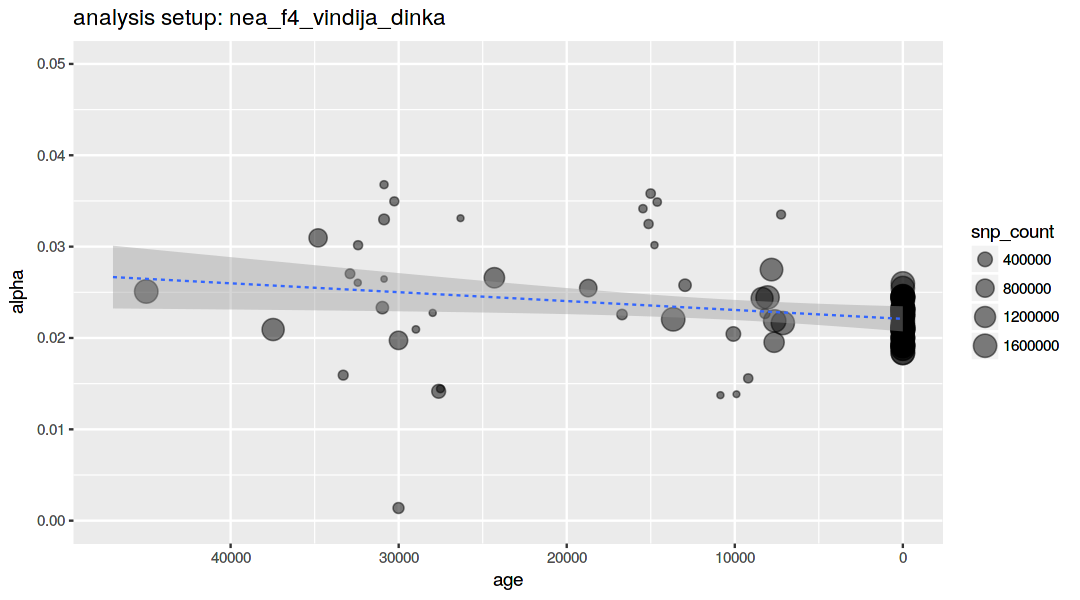

In [11]:
plot_nea_vs_time("nea_f4_vindija_dinka")
run_lm("nea_f4_vindija_dinka")

## Filtering for samples with # of SNPs > snp_cutoff, weighted by the SNP count (EMH + present-day Europe)

In [12]:
options(repr.plot.width=9, repr.plot.height=5)


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
    Min      1Q  Median      3Q     Max 
-9649.0 -4121.1  -951.7  2602.7 14508.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -70430       6611  -10.65 4.13e-13 ***
.[["alpha"]]  3833075     321409   11.93 1.39e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5879 on 39 degrees of freedom
Multiple R-squared:  0.7848,	Adjusted R-squared:  0.7793 
F-statistic: 142.2 on 1 and 39 DF,  p-value: 1.393e-14


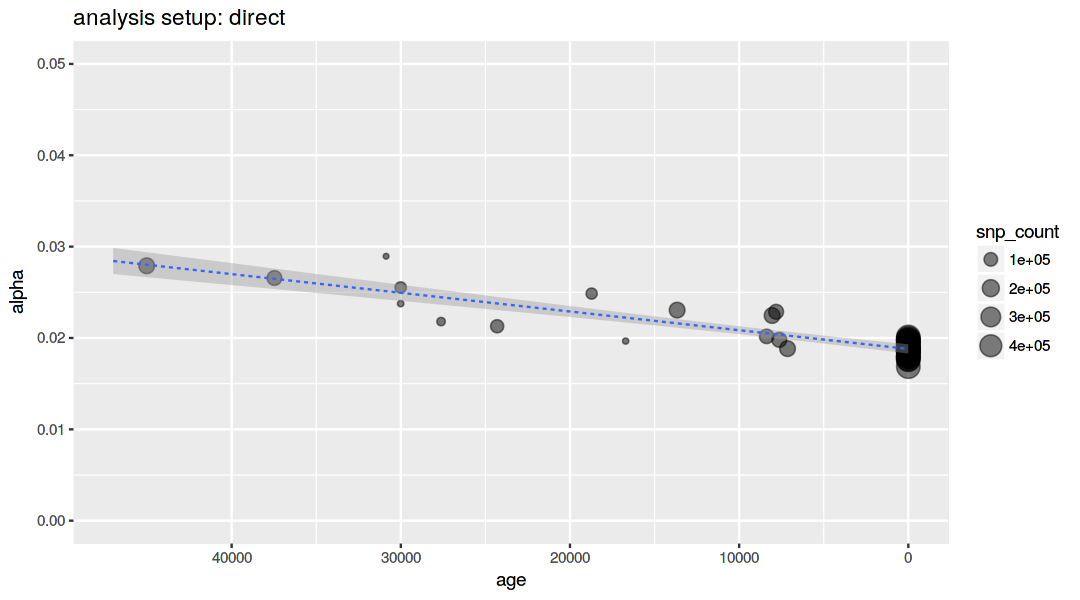

In [13]:
plot_nea_vs_time("direct", snp_cutoff=5000)
run_lm("direct", snp_cutoff=5000)

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
-22751  -2466   -998   1072  17008 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -7463       1130  -6.604 7.28e-09 ***
.[["alpha"]]   816543      55927  14.600  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5581 on 68 degrees of freedom
Multiple R-squared:  0.7581,	Adjusted R-squared:  0.7546 
F-statistic: 213.2 on 1 and 68 DF,  p-value: < 2.2e-16


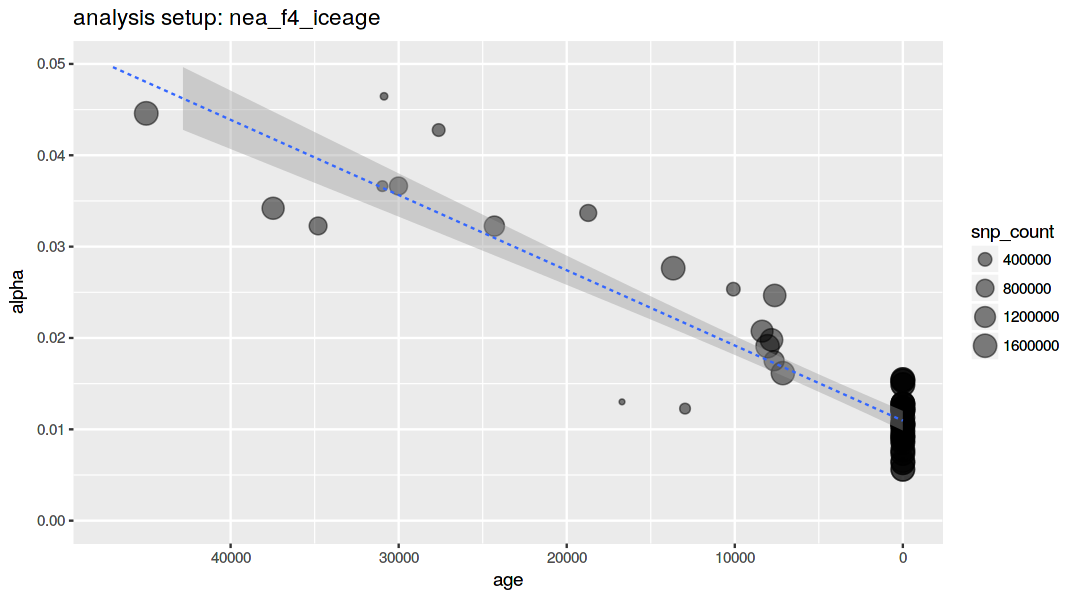

In [14]:
plot_nea_vs_time("nea_f4_iceage", snp_cutoff=100000)
run_lm("nea_f4_iceage", snp_cutoff=100000)

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
 -6121  -5921  -5752   1783  39421 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)      7246       6972   1.039    0.302
.[["alpha"]]   -78767     387246  -0.203    0.839

Residual standard error: 11350 on 68 degrees of freedom
Multiple R-squared:  0.0006081,	Adjusted R-squared:  -0.01409 
F-statistic: 0.04137 on 1 and 68 DF,  p-value: 0.8394


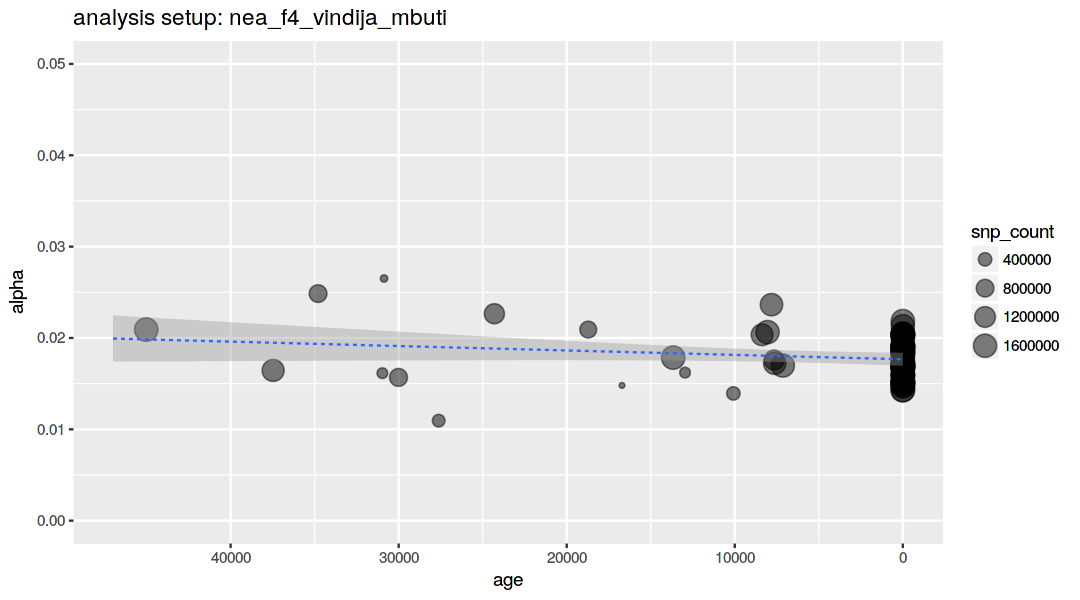

In [15]:
plot_nea_vs_time("nea_f4_vindija_mbuti", snp_cutoff=100000)
run_lm("nea_f4_vindija_mbuti", snp_cutoff=100000)


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
 -7349  -6122  -5093   1363  40919 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)     16617       8162   2.036   0.0457 *
.[["alpha"]]  -479372     358673  -1.337   0.1858  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11200 on 68 degrees of freedom
Multiple R-squared:  0.0256,	Adjusted R-squared:  0.01127 
F-statistic: 1.786 on 1 and 68 DF,  p-value: 0.1858


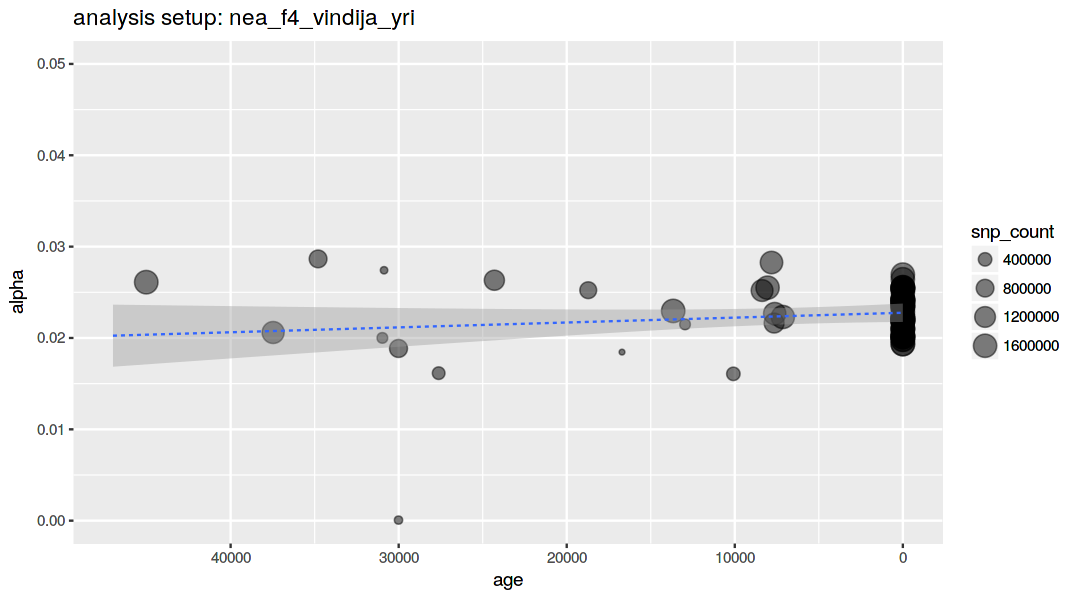

In [16]:
plot_nea_vs_time("nea_f4_vindija_yri", snp_cutoff=100000)
run_lm("nea_f4_vindija_yri", snp_cutoff=100000)


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
 -6534  -5988  -5655   1669  38637 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)      2112       7977   0.265    0.792
.[["alpha"]]   170212     357513   0.476    0.636

Residual standard error: 11330 on 68 degrees of freedom
Multiple R-squared:  0.003322,	Adjusted R-squared:  -0.01133 
F-statistic: 0.2267 on 1 and 68 DF,  p-value: 0.6355


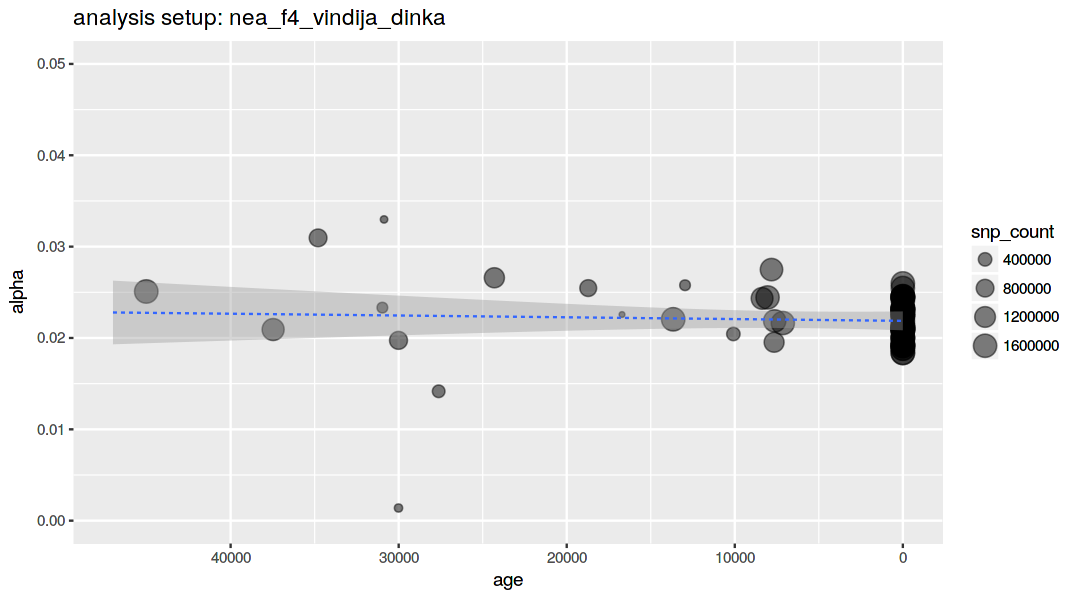

In [17]:
plot_nea_vs_time("nea_f4_vindija_dinka", snp_cutoff=100000)
run_lm("nea_f4_vindija_dinka", snp_cutoff=100000)

<br><br><br><br><br>
# Analysis on EMH without present-day Europeans

## Using all samples, weighted by the SNP count (EMH only)

In [18]:
options(repr.plot.width=9, repr.plot.height=5)


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
-10178  -5955  -4236   2768  38889 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -54267      10053  -5.398 2.42e-06 ***
.[["alpha"]]  3160146     487454   6.483 5.98e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10020 on 45 degrees of freedom
Multiple R-squared:  0.4829,	Adjusted R-squared:  0.4714 
F-statistic: 42.03 on 1 and 45 DF,  p-value: 5.976e-08


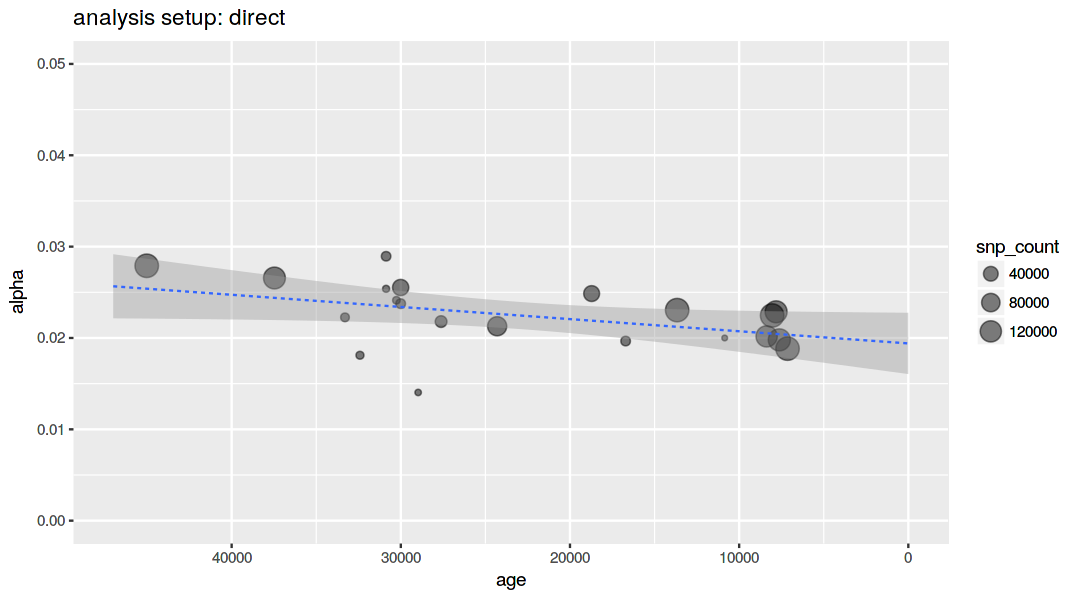

In [19]:
plot_nea_vs_time("direct", age_cutoff=0)
run_lm("direct", age_cutoff=0)

Warning message:
“Removed 7 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 7 rows containing missing values (geom_point).”


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
-26843  -5973  -4244   6832  27698 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     760.9     1564.3   0.486    0.628    
.[["alpha"]] 462021.9    61118.2   7.559 2.65e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9978 on 94 degrees of freedom
Multiple R-squared:  0.3781,	Adjusted R-squared:  0.3715 
F-statistic: 57.15 on 1 and 94 DF,  p-value: 2.653e-11


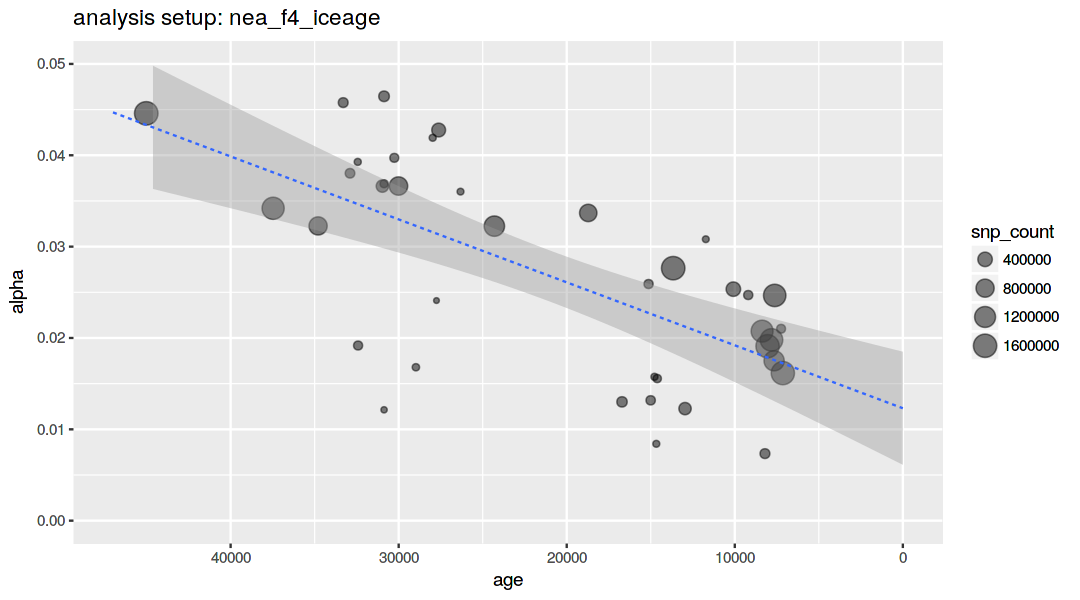

In [20]:
plot_nea_vs_time("nea_f4_iceage", age_cutoff=0)
run_lm("nea_f4_iceage", age_cutoff=0)

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 4 rows containing missing values (geom_point).”


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
-10499  -9690  -9023   5765  34708 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)      6106       2426   2.516   0.0135 *
.[["alpha"]]   201094     114453   1.757   0.0822 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12450 on 94 degrees of freedom
Multiple R-squared:  0.0318,	Adjusted R-squared:  0.0215 
F-statistic: 3.087 on 1 and 94 DF,  p-value: 0.08217


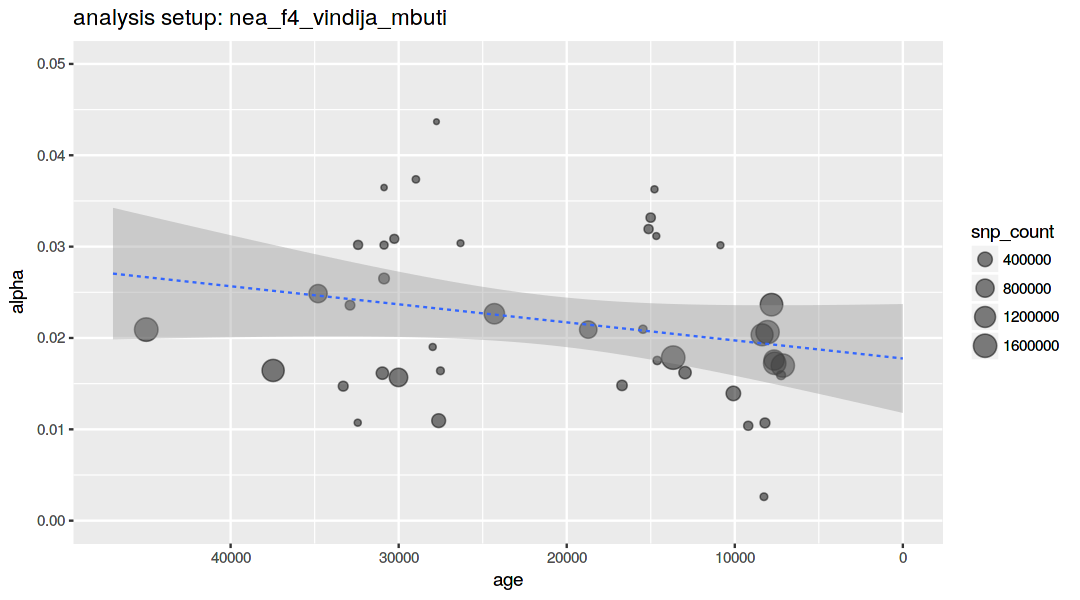

In [21]:
plot_nea_vs_time("nea_f4_vindija_mbuti", age_cutoff=0)
run_lm("nea_f4_vindija_mbuti", age_cutoff=0)

Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 3 rows containing missing values (geom_point).”


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
-10143  -9776  -9463   5875  34954 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)      7657       2756   2.778   0.0066 **
.[["alpha"]]    92259     108130   0.853   0.3957   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12600 on 94 degrees of freedom
Multiple R-squared:  0.007685,	Adjusted R-squared:  -0.002872 
F-statistic: 0.728 on 1 and 94 DF,  p-value: 0.3957


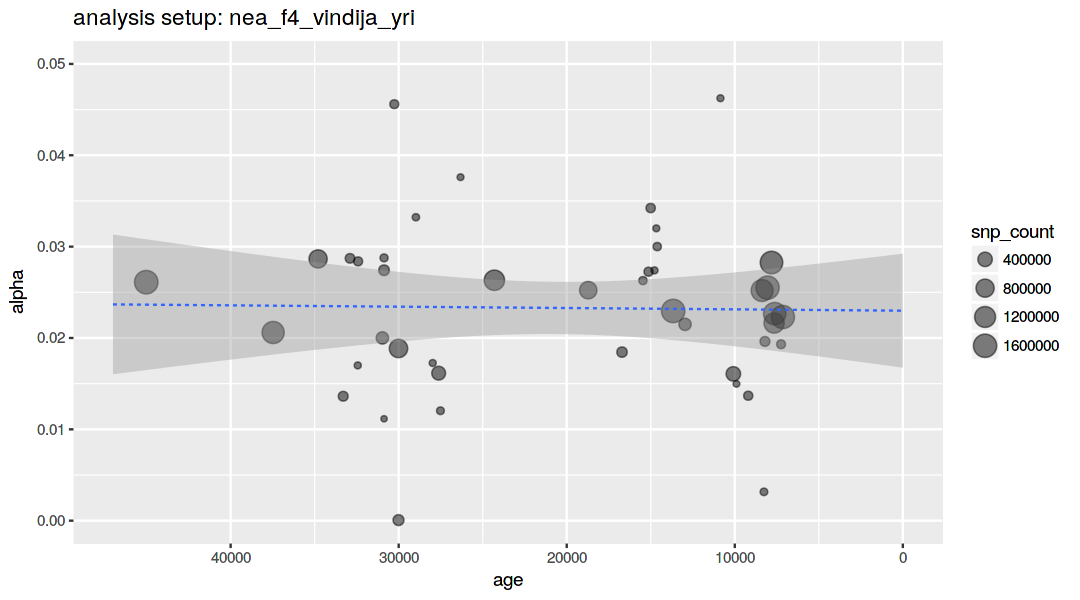

In [22]:
plot_nea_vs_time("nea_f4_vindija_yri", age_cutoff=0)
run_lm("nea_f4_vindija_yri", age_cutoff=0)

Warning message:
“Removed 5 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 5 rows containing missing values (geom_point).”


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
-10395  -9671  -9061   4794  34785 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)      5698       2849   2.000   0.0484 *
.[["alpha"]]   180808     114081   1.585   0.1163  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12490 on 94 degrees of freedom
Multiple R-squared:  0.02603,	Adjusted R-squared:  0.01567 
F-statistic: 2.512 on 1 and 94 DF,  p-value: 0.1163


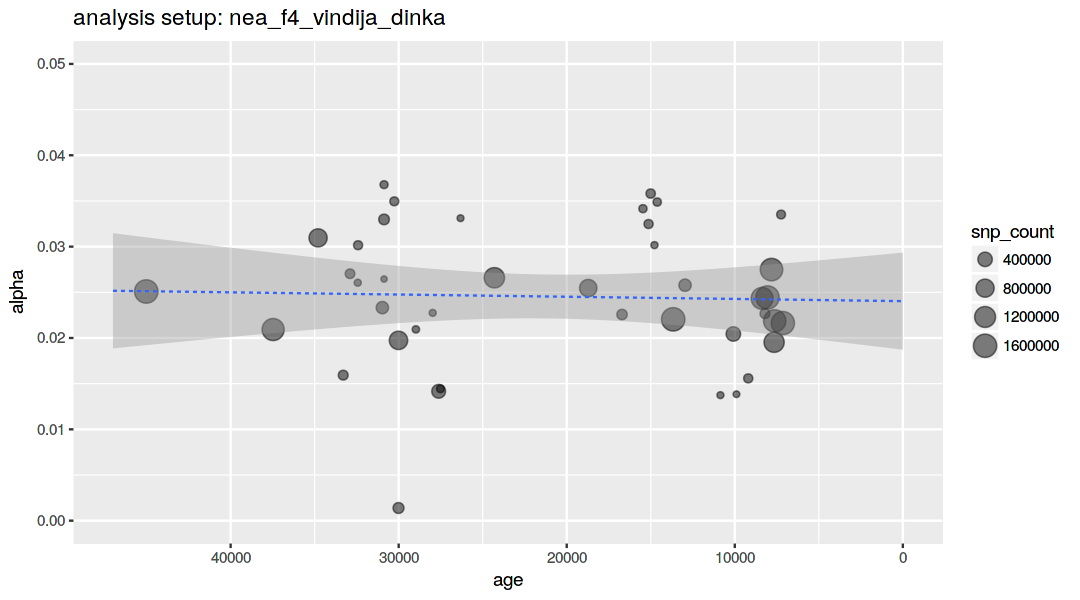

In [23]:
plot_nea_vs_time("nea_f4_vindija_dinka", age_cutoff=0)
run_lm("nea_f4_vindija_dinka", age_cutoff=0)

## Filtering for samples with # of SNPs > snp_cutoff, weighted by the SNP count (EMH only)

In [24]:
options(repr.plot.width=9, repr.plot.height=5)


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
    Min      1Q  Median      3Q     Max 
-9649.0 -4121.1  -951.7  2602.7 14508.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -70430       6611  -10.65 4.13e-13 ***
.[["alpha"]]  3833075     321409   11.93 1.39e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5879 on 39 degrees of freedom
Multiple R-squared:  0.7848,	Adjusted R-squared:  0.7793 
F-statistic: 142.2 on 1 and 39 DF,  p-value: 1.393e-14


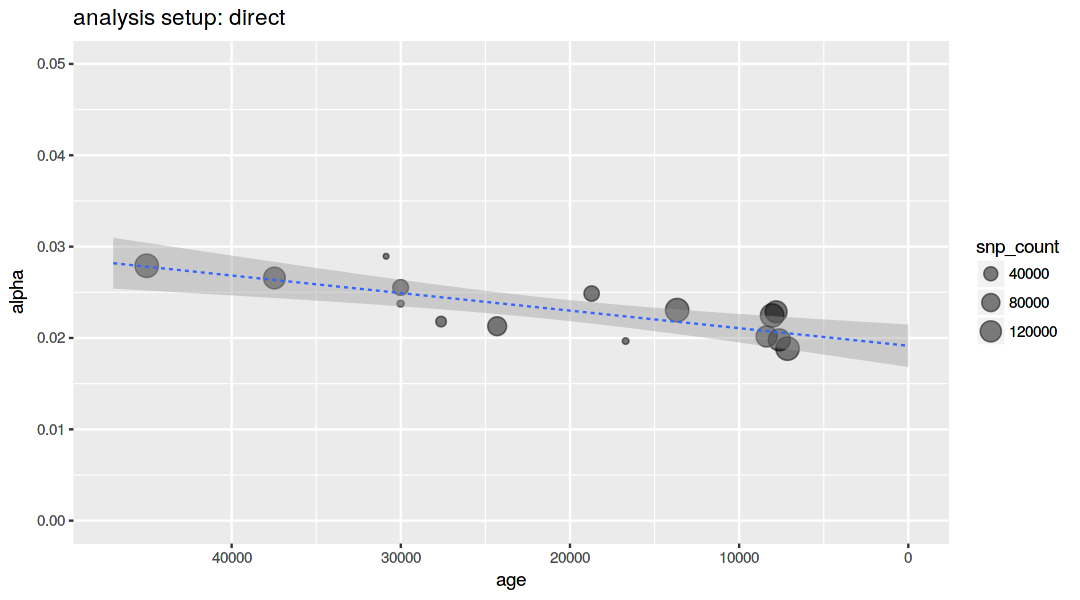

In [25]:
plot_nea_vs_time("direct", snp_cutoff=5000, age_cutoff=0)
run_lm("direct", snp_cutoff=5000, age_cutoff=0)

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
-22751  -2466   -998   1072  17008 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -7463       1130  -6.604 7.28e-09 ***
.[["alpha"]]   816543      55927  14.600  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5581 on 68 degrees of freedom
Multiple R-squared:  0.7581,	Adjusted R-squared:  0.7546 
F-statistic: 213.2 on 1 and 68 DF,  p-value: < 2.2e-16


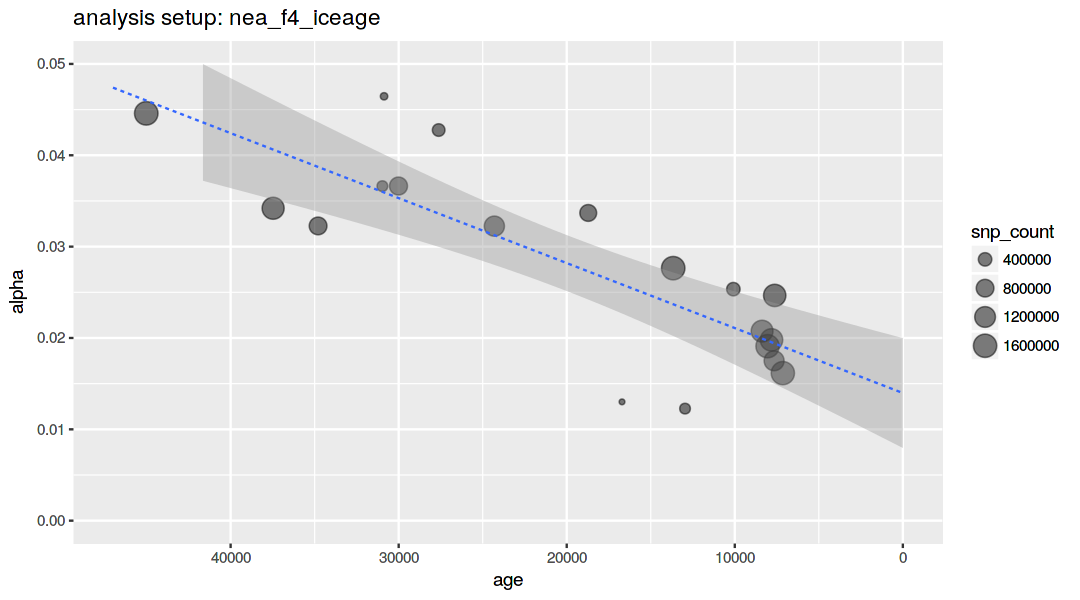

In [26]:
plot_nea_vs_time("nea_f4_iceage", snp_cutoff=100000, age_cutoff=0)
run_lm("nea_f4_iceage", snp_cutoff=100000, age_cutoff=0)

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
 -6121  -5921  -5752   1783  39421 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)      7246       6972   1.039    0.302
.[["alpha"]]   -78767     387246  -0.203    0.839

Residual standard error: 11350 on 68 degrees of freedom
Multiple R-squared:  0.0006081,	Adjusted R-squared:  -0.01409 
F-statistic: 0.04137 on 1 and 68 DF,  p-value: 0.8394


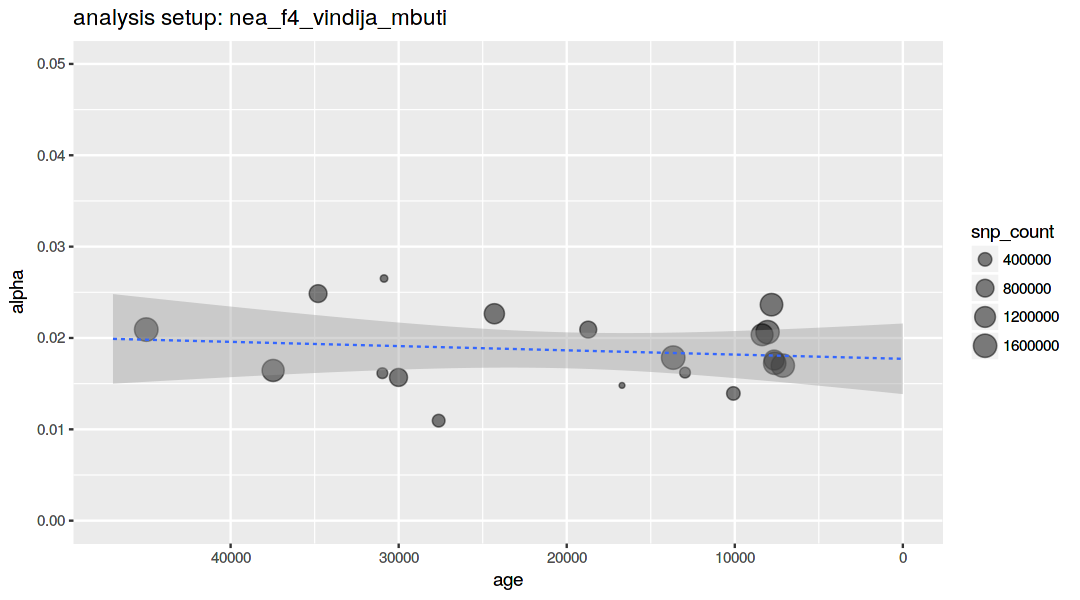

In [27]:
plot_nea_vs_time("nea_f4_vindija_mbuti", snp_cutoff=100000, age_cutoff=0)
run_lm("nea_f4_vindija_mbuti", snp_cutoff=100000, age_cutoff=0)


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
 -7349  -6122  -5093   1363  40919 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)     16617       8162   2.036   0.0457 *
.[["alpha"]]  -479372     358673  -1.337   0.1858  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11200 on 68 degrees of freedom
Multiple R-squared:  0.0256,	Adjusted R-squared:  0.01127 
F-statistic: 1.786 on 1 and 68 DF,  p-value: 0.1858


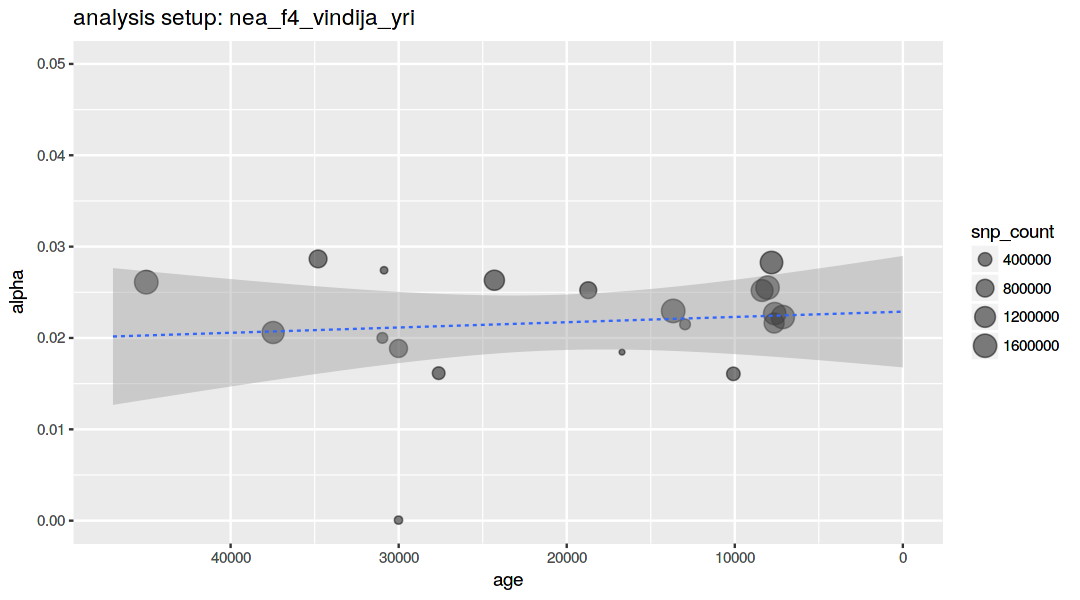

In [28]:
plot_nea_vs_time("nea_f4_vindija_yri", snp_cutoff=100000, age_cutoff=0)
run_lm("nea_f4_vindija_yri", snp_cutoff=100000, age_cutoff=0)


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
 -6534  -5988  -5655   1669  38637 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)      2112       7977   0.265    0.792
.[["alpha"]]   170212     357513   0.476    0.636

Residual standard error: 11330 on 68 degrees of freedom
Multiple R-squared:  0.003322,	Adjusted R-squared:  -0.01133 
F-statistic: 0.2267 on 1 and 68 DF,  p-value: 0.6355


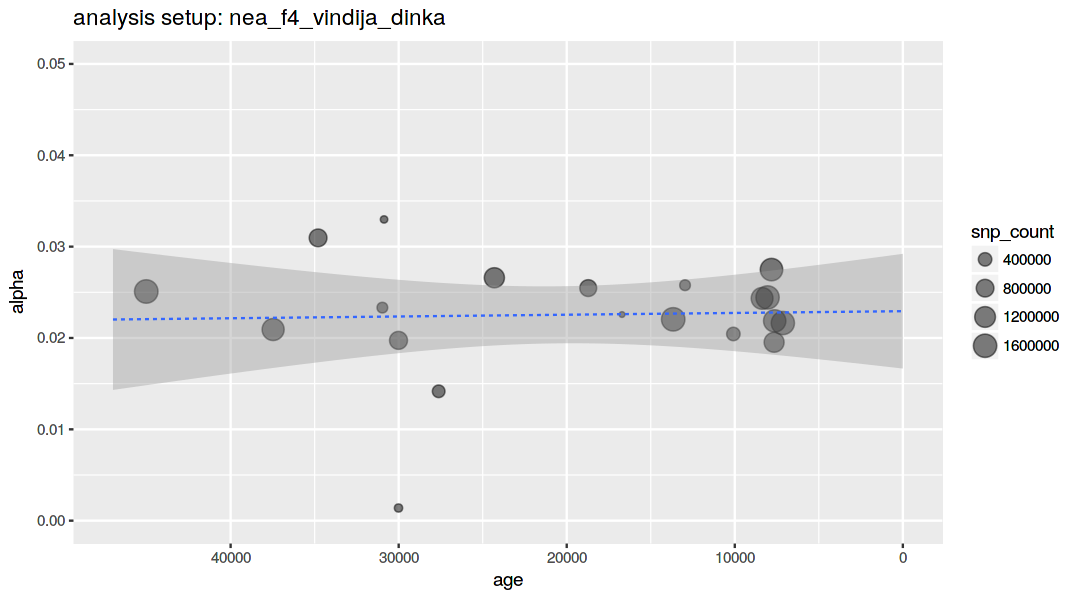

In [29]:
plot_nea_vs_time("nea_f4_vindija_dinka", snp_cutoff=100000, age_cutoff=0)
run_lm("nea_f4_vindija_dinka", snp_cutoff=100000, age_cutoff=0)

<br><br><br><br><br>
# Analysis on EMH without samples younger than 8ky

## Using all samples, weighted by the SNP count (EMH only)

In [30]:
options(repr.plot.width=9, repr.plot.height=5)


Call:
lm(formula = .[["age"]] ~ .[["alpha"]])

Residuals:
   Min     1Q Median     3Q    Max 
-14098  -3485   1117   6436  13074 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)      7257      13351   0.544    0.595
.[["alpha"]]   884844     574253   1.541    0.146

Residual standard error: 8494 on 14 degrees of freedom
Multiple R-squared:  0.145,	Adjusted R-squared:  0.08393 
F-statistic: 2.374 on 1 and 14 DF,  p-value: 0.1456


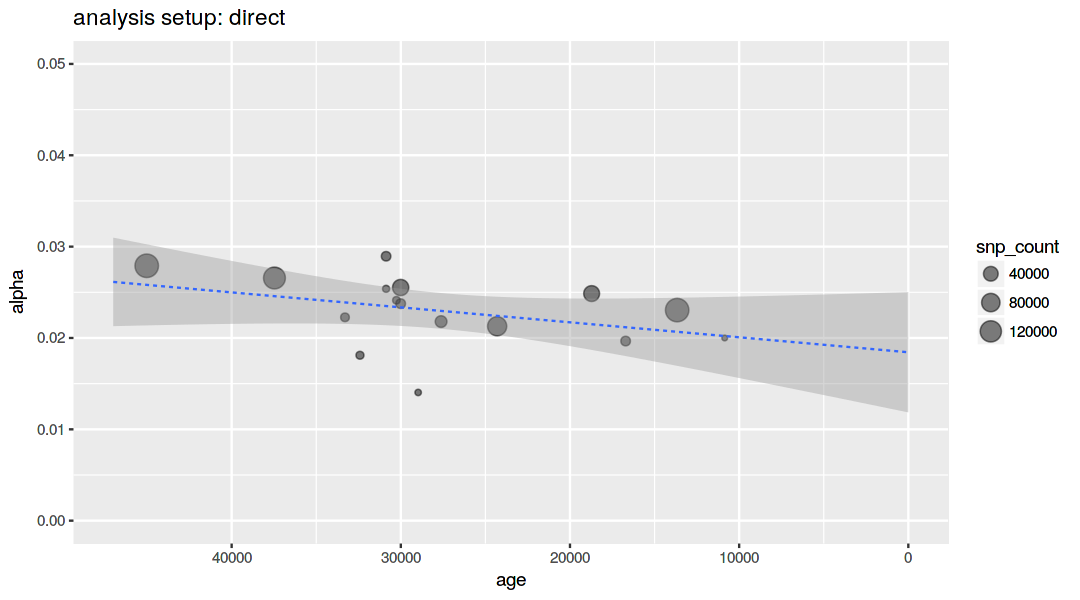

In [31]:
plot_nea_vs_time("direct", age_cutoff=10000)
run_lm("direct", age_cutoff=10000)